In [1]:

import json
from collections import Counter

import matplotlib.pyplot as plt
import os

plt.rcParams['axes.unicode_minus'] = False

In [2]:

model_names = [
    "none",
    "peak",
    "full"
]
checkpoint_path = "e:\\codes\\backup\\experiments_final"
eval_folder = "evals"
s = "unseen"
val_set = "val_%s" % (s)
summary = {}
metrics = []
for model_name in model_names:
    print(model_name)
    result = {}
    result_files = list(
        os.listdir(os.path.join(checkpoint_path, model_name, eval_folder))
    )
    for result_file in result_files:
        print(result_file)
        if val_set in result_file and "json" in result_file:
            path = os.path.join(
                checkpoint_path, model_name, eval_folder, result_file
            )
            with open(path, "r") as f:
                data = json.loads(f.read())
            idx = int(result_file.split("_")[2])
            result[idx] = data
    result = sorted(result.items(), key=lambda d: d[0], reverse=False)
    index = [int(v[0]) for v in result]
    result = [v[1] for v in result]
    metrics = list(result[0].keys())
    result = dict(
        zip(
            list(result[0].keys()),
            list(zip(*[[k[1] for k in v.items()] for v in result])),
        )
    )
    for k, v in result.items():
        result[k] = dict(zip(index, v))
    summary[model_name] = result

none
stats_ckpt_0_val_seen.json
stats_ckpt_0_val_unseen.json
stats_ckpt_10_val_seen.json
stats_ckpt_10_val_unseen.json
stats_ckpt_12_val_seen.json
stats_ckpt_12_val_unseen.json
stats_ckpt_14_val_seen.json
stats_ckpt_14_val_unseen.json
stats_ckpt_16_val_seen.json
stats_ckpt_16_val_unseen.json
stats_ckpt_18_val_seen.json
stats_ckpt_18_val_unseen.json
stats_ckpt_20_val_seen.json
stats_ckpt_20_val_unseen.json
stats_ckpt_22_val_seen.json
stats_ckpt_22_val_unseen.json
stats_ckpt_24_val_seen.json
stats_ckpt_24_val_unseen.json
stats_ckpt_26_val_seen.json
stats_ckpt_26_val_unseen.json
stats_ckpt_28_val_seen.json
stats_ckpt_28_val_unseen.json
stats_ckpt_2_val_seen.json
stats_ckpt_2_val_unseen.json
stats_ckpt_30_val_seen.json
stats_ckpt_30_val_unseen.json
stats_ckpt_32_val_seen.json
stats_ckpt_32_val_unseen.json
stats_ckpt_34_val_seen.json
stats_ckpt_34_val_unseen.json
stats_ckpt_36_val_seen.json
stats_ckpt_36_val_unseen.json
stats_ckpt_38_val_seen.json
stats_ckpt_38_val_unseen.json
stats_ckpt_4_

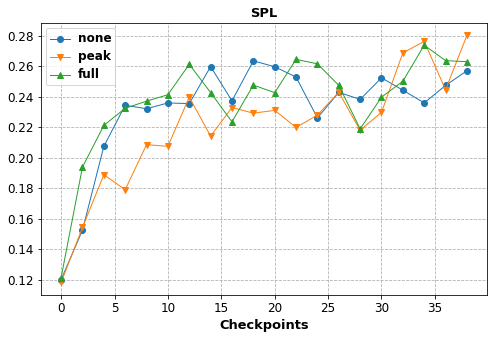

In [3]:
plt.figure(figsize=(8,5))
plt.grid(linestyle = "--") 
ax = plt.gca()
# ax.spines['top'].set_visible(False) 
# ax.spines['right'].set_visible(False) 
plt.plot(summary["none"]["spl"].keys(), summary["none"]["spl"].values(), label="none",marker='o', linewidth=1.0, linestyle="-", markersize=6)
plt.plot(summary["peak"]["spl"].keys(), summary["peak"]["spl"].values(), label="peak",marker='v', linewidth=1.0, linestyle="-", markersize=6)
plt.plot(summary["full"]["spl"].keys(), summary["full"]["spl"].values(), label="full",marker='^', linewidth=1.0, linestyle="-", markersize=6)

plt.xticks(fontsize=12, )
plt.yticks(fontsize=12, )

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=12, fontweight='bold')
plt.xlabel("Checkpoints", fontsize=13, fontweight='bold')
plt.title("SPL", fontsize=13, fontweight='bold')
plt.savefig("spl.pdf", bbox_inches='tight')
plt.show()